C:\Users\Dharani Ravi\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 61ms/step - accuracy: 0.5592 - loss: 0.6966 - val_accuracy: 0.5500 - val_loss: 0.7057
Epoch 2/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.5884 - loss: 0.6852 - val_accuracy: 0.5500 - val_loss: 0.7071
Epoch 3/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.5435 - loss: 0.7048 - val_accuracy: 0.5750 - val_loss: 0.7051
Epoch 4/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.5850 - loss: 0.6827 - val_accuracy: 0.5750 - val_loss: 0.7020
Epoch 5/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.5700 - loss: 0.6849 - val_accuracy: 0.5750 - val_loss: 0.7035
Epoch 6/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.6416 - loss: 0.6766 - val_accuracy: 0.5750 - val_loss: 0.7023
Epoch 7/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.5950 - loss: 0.6758 - val_accuracy: 0.5750 - val_loss: 0.7010
Epoch 8/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.5788 - loss: 0.6783 - val_accuracy: 0.5750 - v

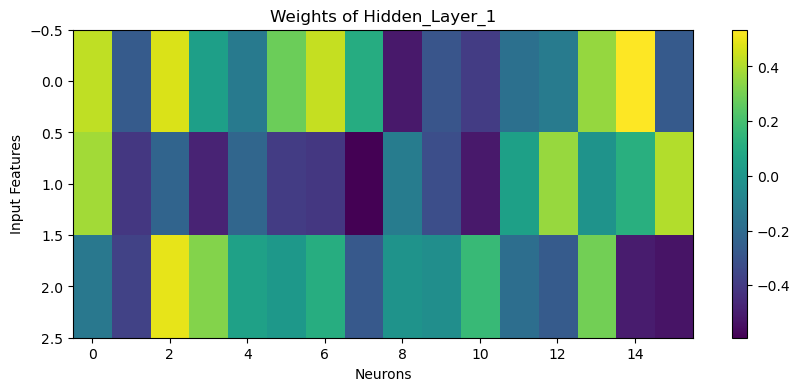

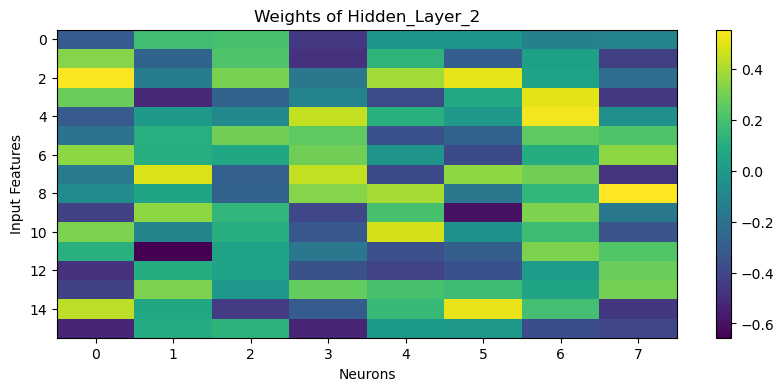

AttributeError: The layer sequential has never been called and thus has no defined input.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import plot_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

file_path = "C:\\Users\\Dharani Ravi\\Downloads\\kmeans\\Mall_Customers.csv"
df = pd.read_csv(file_path)

df['Genre'] = LabelEncoder().fit_transform(df['Genre'])

X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
y = df['Genre']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model = keras.Sequential([
    keras.layers.Dense(16, activation='relu', input_shape=(X_train.shape[1],), name="Hidden_Layer_1"),
    keras.layers.Dense(8, activation='relu', name="Hidden_Layer_2"),
    keras.layers.Dense(1, activation='sigmoid', name="Output_Layer")
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=50, batch_size=10, validation_data=(X_test, y_test), verbose=1)

plot_model(model, to_file="model_architecture.png", show_shapes=True, show_layer_names=True)

for layer in model.layers:
    if "Hidden_Layer" in layer.name:
        weights, biases = layer.get_weights()
        plt.figure(figsize=(10, 4))
        plt.imshow(weights, cmap='viridis', aspect='auto')
        plt.colorbar()
        plt.title(f"Weights of {layer.name}")
        plt.xlabel("Neurons")
        plt.ylabel("Input Features")
        plt.show()

activation_model = keras.models.Model(inputs=model.input, outputs=[layer.output for layer in model.layers])

sample_input = np.expand_dims(X_test[0], axis=0)
activations = activation_model.predict(sample_input)

for i, activation in enumerate(activations[:-1]):
    plt.figure(figsize=(8, 4))
    plt.imshow(activation, aspect='auto', cmap='inferno')
    plt.colorbar()
    plt.title(f"Activation of Layer {i+1} ({model.layers[i].name})")
    plt.show()
